# Model card for MatCha - fine-tuned on ChartQA

- This model is the MatCha model, fine-tuned on Chart2text-pew dataset.
- https://huggingface.co/google/matcha-chartqa

In [2]:
import requests
from PIL import Image
from matplotlib.pyplot import imshow
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration


/root/miniconda3/envs/poc_vqa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
processor = Pix2StructProcessor.from_pretrained('google/matcha-chartqa')
model = Pix2StructForConditionalGeneration.from_pretrained('google/matcha-chartqa')


2024-03-23 10:39:59.036808: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 10:39:59.842223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


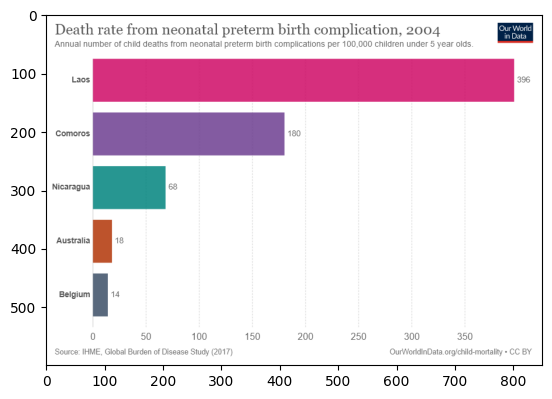

In [5]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/20294671002019.png"
img = Image.open(requests.get(url, stream=True).raw, 'r')

imshow(img)


In [6]:
image = Image.open(requests.get(url, stream=True).raw)

In [9]:
inputs = processor(
    images=image, 
    text="Name all the colors that the image has", 
    return_tensors="pt")
predictions = model.generate(**inputs, max_new_tokens=512)

print(processor.decode(predictions[0], skip_special_tokens=True))

Pink


In [2]:
!pip install --upgrade huggingface_hub


  Using cached huggingface_hub-0.21.4-py3-none-any.whl.metadata (13 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
Using cached huggingface_hub-0.21.4-py3-none-any.whl (346 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 9.2 MB/s eta 0:00:00:00:0100:01
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.6 MB/s eta 0:00:00
Using cached idna-3.6-py3-none-any.whl (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install transformers



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.3 MB/s eta 0:00:0000:0100:01m


In [1]:
from huggingface_hub import InferenceClient

/root/miniconda3/envs/poc_vqa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
client = InferenceClient()

image = client.text_to_image("a person with a flower in their hand")


In [5]:
image.save("img.png")

In [7]:
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.7 MB/s eta 0:00:00:00:0100:01
